# Using Correlations

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
df = pd.read_csv('df_1.csv')

In [2]:
df.drop(axis = 1, columns = 'Unnamed: 0', inplace = True)

In [3]:
df.keys()

Index(['prices.amountMax', 'prices.isSale', 'prices.dateSeenYear',
       'prices.dateSeenMonth', 'prices.dateSeenWeek', 'prices.dateSeenDay',
       'prices.dateSeenDayofweek', 'prices.dateSeenDayofyear',
       'prices.dateSeenIs_month_end', 'prices.dateSeenIs_month_start',
       ...
       'colors_Multicolor', 'colors_Pink', 'colors_Red', 'colors_Silver',
       'colors_White', 'colors_nan_value', 'colors_other',
       'prices.currency_AUD', 'prices.currency_CAD', 'prices.currency_USD'],
      dtype='object', length=103)

In [43]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 1:]
y = df['prices.amountMax']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)

In [5]:
X.shape

(5404, 102)

This time our dataset has 102 features and 5404 observations.  Now let's perform RFE to narrow down our number of features.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV, RFE
estimator = LinearRegression(n_jobs=-1)
initial_rfe = RFECV(estimator, step=1, cv=3)
X_train_rfe = initial_rfe.fit_transform(X_train,y_train)

In [7]:
initial_rfe.grid_scores_

array([ 3.37617615e-02,  7.81610702e-02,  1.01198946e-01,  1.48673588e-01,
        1.51402091e-01,  1.51659334e-01,  1.51707802e-01,  1.54903021e-01,
        1.55602165e-01,  1.55602165e-01,  1.57069867e-01,  1.58787387e-01,
        1.58792267e-01,  1.65244870e-01,  1.65669739e-01,  1.65496620e-01,
        1.66148145e-01,  1.96037628e-01,  1.97275530e-01,  2.06475349e-01,
        2.10969772e-01, -1.96333619e+19, -9.38762047e+20, -1.78779087e+22,
       -5.27508512e+22, -8.98266052e+21, -6.20217731e+21, -4.05990570e+22,
       -3.81733309e+22, -3.79122663e+20, -1.28683795e+21, -4.37876115e+20,
       -9.00557486e+20, -2.91178503e+21, -7.15571928e+23, -2.70230813e+21,
       -1.47989115e+22, -8.70355739e+20, -1.39362610e+22, -1.55295648e+23,
       -2.35629283e+23, -1.20604683e+23, -1.86585685e+23, -2.80983329e+24,
       -1.42717479e+24, -3.30505508e+23, -3.43663486e+21, -3.83802000e+21,
       -1.18235387e+22, -6.23085465e+22, -1.18826818e+22, -4.48948208e+21,
       -3.19372026e+21, -

It looks like 82 features is our number, as we still have a score of `.436`.  Let's discover which six features were selected.

In [8]:
estimator = LinearRegression(n_jobs=-1)
rfe = RFE(estimator, 82)
X_train_rfe = rfe.fit_transform(X_train,y_train)

In [9]:
estimator.fit(X_train_rfe, y_train)
x_test_rfe = rfe.transform(X_test)
estimator.score(x_test_rfe, y_test)

0.4130480275909336

Now we can again use the `support_` method.

In [10]:
import numpy as np
selected_feat_names = np.array(X.columns)[rfe.support_]

selected_feat_names

array(['prices.isSale', 'prices.dateSeenYear', 'prices.dateSeenMonth',
       'prices.dateSeenWeek', 'prices.dateSeenIs_month_start',
       'prices.dateSeenIs_year_end', 'brand_Alfani', 'brand_Asics',
       'brand_Bearpaw', 'brand_Bloch', 'brand_Brinley Co.',
       'brand_Charles by Charles David', 'brand_Converse', 'brand_Crocs',
       'brand_Dansko', 'brand_Easy Spirit', 'brand_MICHAEL Michael Kors',
       'brand_New Balance', 'brand_Nike', 'brand_Nine West',
       'brand_Nomad', 'brand_Propet', 'brand_Telic', 'brand_Ugg',
       'brand_Under Armour', 'brand_VANS', 'manufacturer_Alfani',
       'manufacturer_Bearpaw', 'manufacturer_Bloch',
       'manufacturer_Brinley Co', 'manufacturer_Charles by Charles David',
       'manufacturer_Converse', 'manufacturer_Crocs',
       'manufacturer_DANSKO', 'manufacturer_Dansko',
       'manufacturer_MICHAEL Michael Kors', 'manufacturer_New Balance',
       'manufacturer_Nike', 'manufacturer_Nine West',
       'manufacturer_Nomad', 'manufa

Now that we have selected our most important features, we can begin to explore the similarities between the data to see if it makes sense to reduce our data further.

### Exploring Correlations

To see which features may still be redundant, we should explore correlations between the data.

First we select the top 82 features.

In [11]:
reduced_X = X_train[selected_feat_names]

In [12]:
reduced_X.shape

(3620, 82)

In [13]:
reduced_X[:2]

,prices.isSale,prices.dateSeenYear,prices.dateSeenMonth,prices.dateSeenWeek,prices.dateSeenIs_month_start,prices.dateSeenIs_year_end,brand_Alfani,brand_Asics,brand_Bearpaw,brand_Bloch,...,colors_Blue,colors_Brown,colors_Gray,colors_Green,colors_Pink,colors_Red,colors_Silver,colors_White,colors_nan_value,prices.currency_AUD
4694,False,2016,11,44,False,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2543,True,2016,11,44,False,False,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
import pandas as pd
df_reduced = pd.DataFrame(reduced_X, columns = selected_feat_names)

In [15]:
# change boolean value to int
bool_cols = df_reduced.select_dtypes(include='bool').columns

In [16]:
bool_cols

Index(['prices.isSale', 'prices.dateSeenIs_month_start',
       'prices.dateSeenIs_year_end'],
      dtype='object')

In [17]:
df_reduced[bool_cols] = df_reduced[bool_cols].astype(int)

### Switching to Spearman Correlation

In [18]:
df_reduced.corr(method = 'spearman')

,prices.isSale,prices.dateSeenYear,prices.dateSeenMonth,prices.dateSeenWeek,prices.dateSeenIs_month_start,prices.dateSeenIs_year_end,brand_Alfani,brand_Asics,brand_Bearpaw,brand_Bloch,...,colors_Blue,colors_Brown,colors_Gray,colors_Green,colors_Pink,colors_Red,colors_Silver,colors_White,colors_nan_value,prices.currency_AUD
prices.isSale,1.000000,-0.223825,0.213661,0.206735,0.040612,-0.027944,0.021741,-0.067715,-0.017103,-0.030060,...,0.003459,0.008874,0.069882,0.039847,-0.020433,-0.065842,0.015167,0.014748,0.204076,-0.011400
prices.dateSeenYear,-0.223825,1.000000,-0.719565,-0.719934,-0.132508,-0.073321,-0.068658,-0.012641,-0.067738,-0.157930,...,0.007221,0.015384,-0.063707,-0.048510,0.002480,0.044092,-0.094275,0.029193,-0.109517,-0.008219
prices.dateSeenMonth,0.213661,-0.719565,1.000000,0.964066,0.215889,0.071977,0.067754,-0.016034,0.060321,-0.033579,...,-0.022196,0.001946,0.113825,0.061889,-0.004566,-0.043221,0.136709,-0.013336,0.071329,-0.019796
prices.dateSeenWeek,0.206735,-0.719934,0.964066,1.000000,0.150378,0.071355,0.079033,-0.024303,0.058473,-0.034315,...,-0.022767,-0.002181,0.093022,0.062011,-0.010525,-0.041686,0.145000,-0.012932,0.067078,-0.019775
prices.dateSeenIs_month_start,0.040612,-0.132508,0.215889,0.150378,1.000000,-0.008819,-0.023166,0.004821,0.055291,-0.010974,...,0.023163,0.031216,-0.000994,0.055385,-0.000994,-0.012330,-0.004656,0.025291,-0.055834,-0.003598
prices.dateSeenIs_year_end,-0.027944,-0.073321,0.071977,0.071355,-0.008819,1.000000,-0.004361,-0.005154,-0.005804,-0.004415,...,-0.008904,0.014552,-0.006580,0.038827,-0.006580,0.034332,-0.007738,-0.009722,-0.011475,-0.000677
brand_Alfani,0.021741,-0.068658,0.067754,0.079033,-0.023166,-0.004361,1.000000,-0.013538,-0.015247,-0.011596,...,-0.010874,-0.020137,-0.017284,0.018183,-0.017284,0.013570,0.008160,-0.002412,-0.000127,-0.001779
brand_Asics,-0.067715,-0.012641,-0.016034,-0.024303,0.004821,-0.005154,-0.013538,1.000000,-0.018018,-0.013704,...,-0.027641,-0.035620,-0.020425,0.098417,-0.020425,0.153733,0.048620,-0.030180,-0.035620,-0.002102
brand_Bearpaw,-0.017103,-0.067738,0.060321,0.058473,0.055291,-0.005804,-0.015247,-0.018018,1.000000,-0.015434,...,-0.012159,-0.009786,-0.023004,-0.021956,0.027283,-0.024134,-0.027052,-0.033991,-0.009786,-0.002368
brand_Bloch,-0.030060,-0.157930,-0.033579,-0.034315,-0.010974,-0.004415,-0.011596,-0.013704,-0.015434,1.000000,...,0.075267,-0.030512,-0.017496,-0.016699,0.146414,-0.018355,-0.020574,-0.025852,-0.030512,-0.001801


# Working with Dendrograms

### Introduction

Now previously, we plotted both our relationships among variables with scatter plots.  In this section, we'll use a dendrogram to see if two variables are assosicated with one another.  Ok, so let's start by plotting our scatter matrix of the rank of the features.

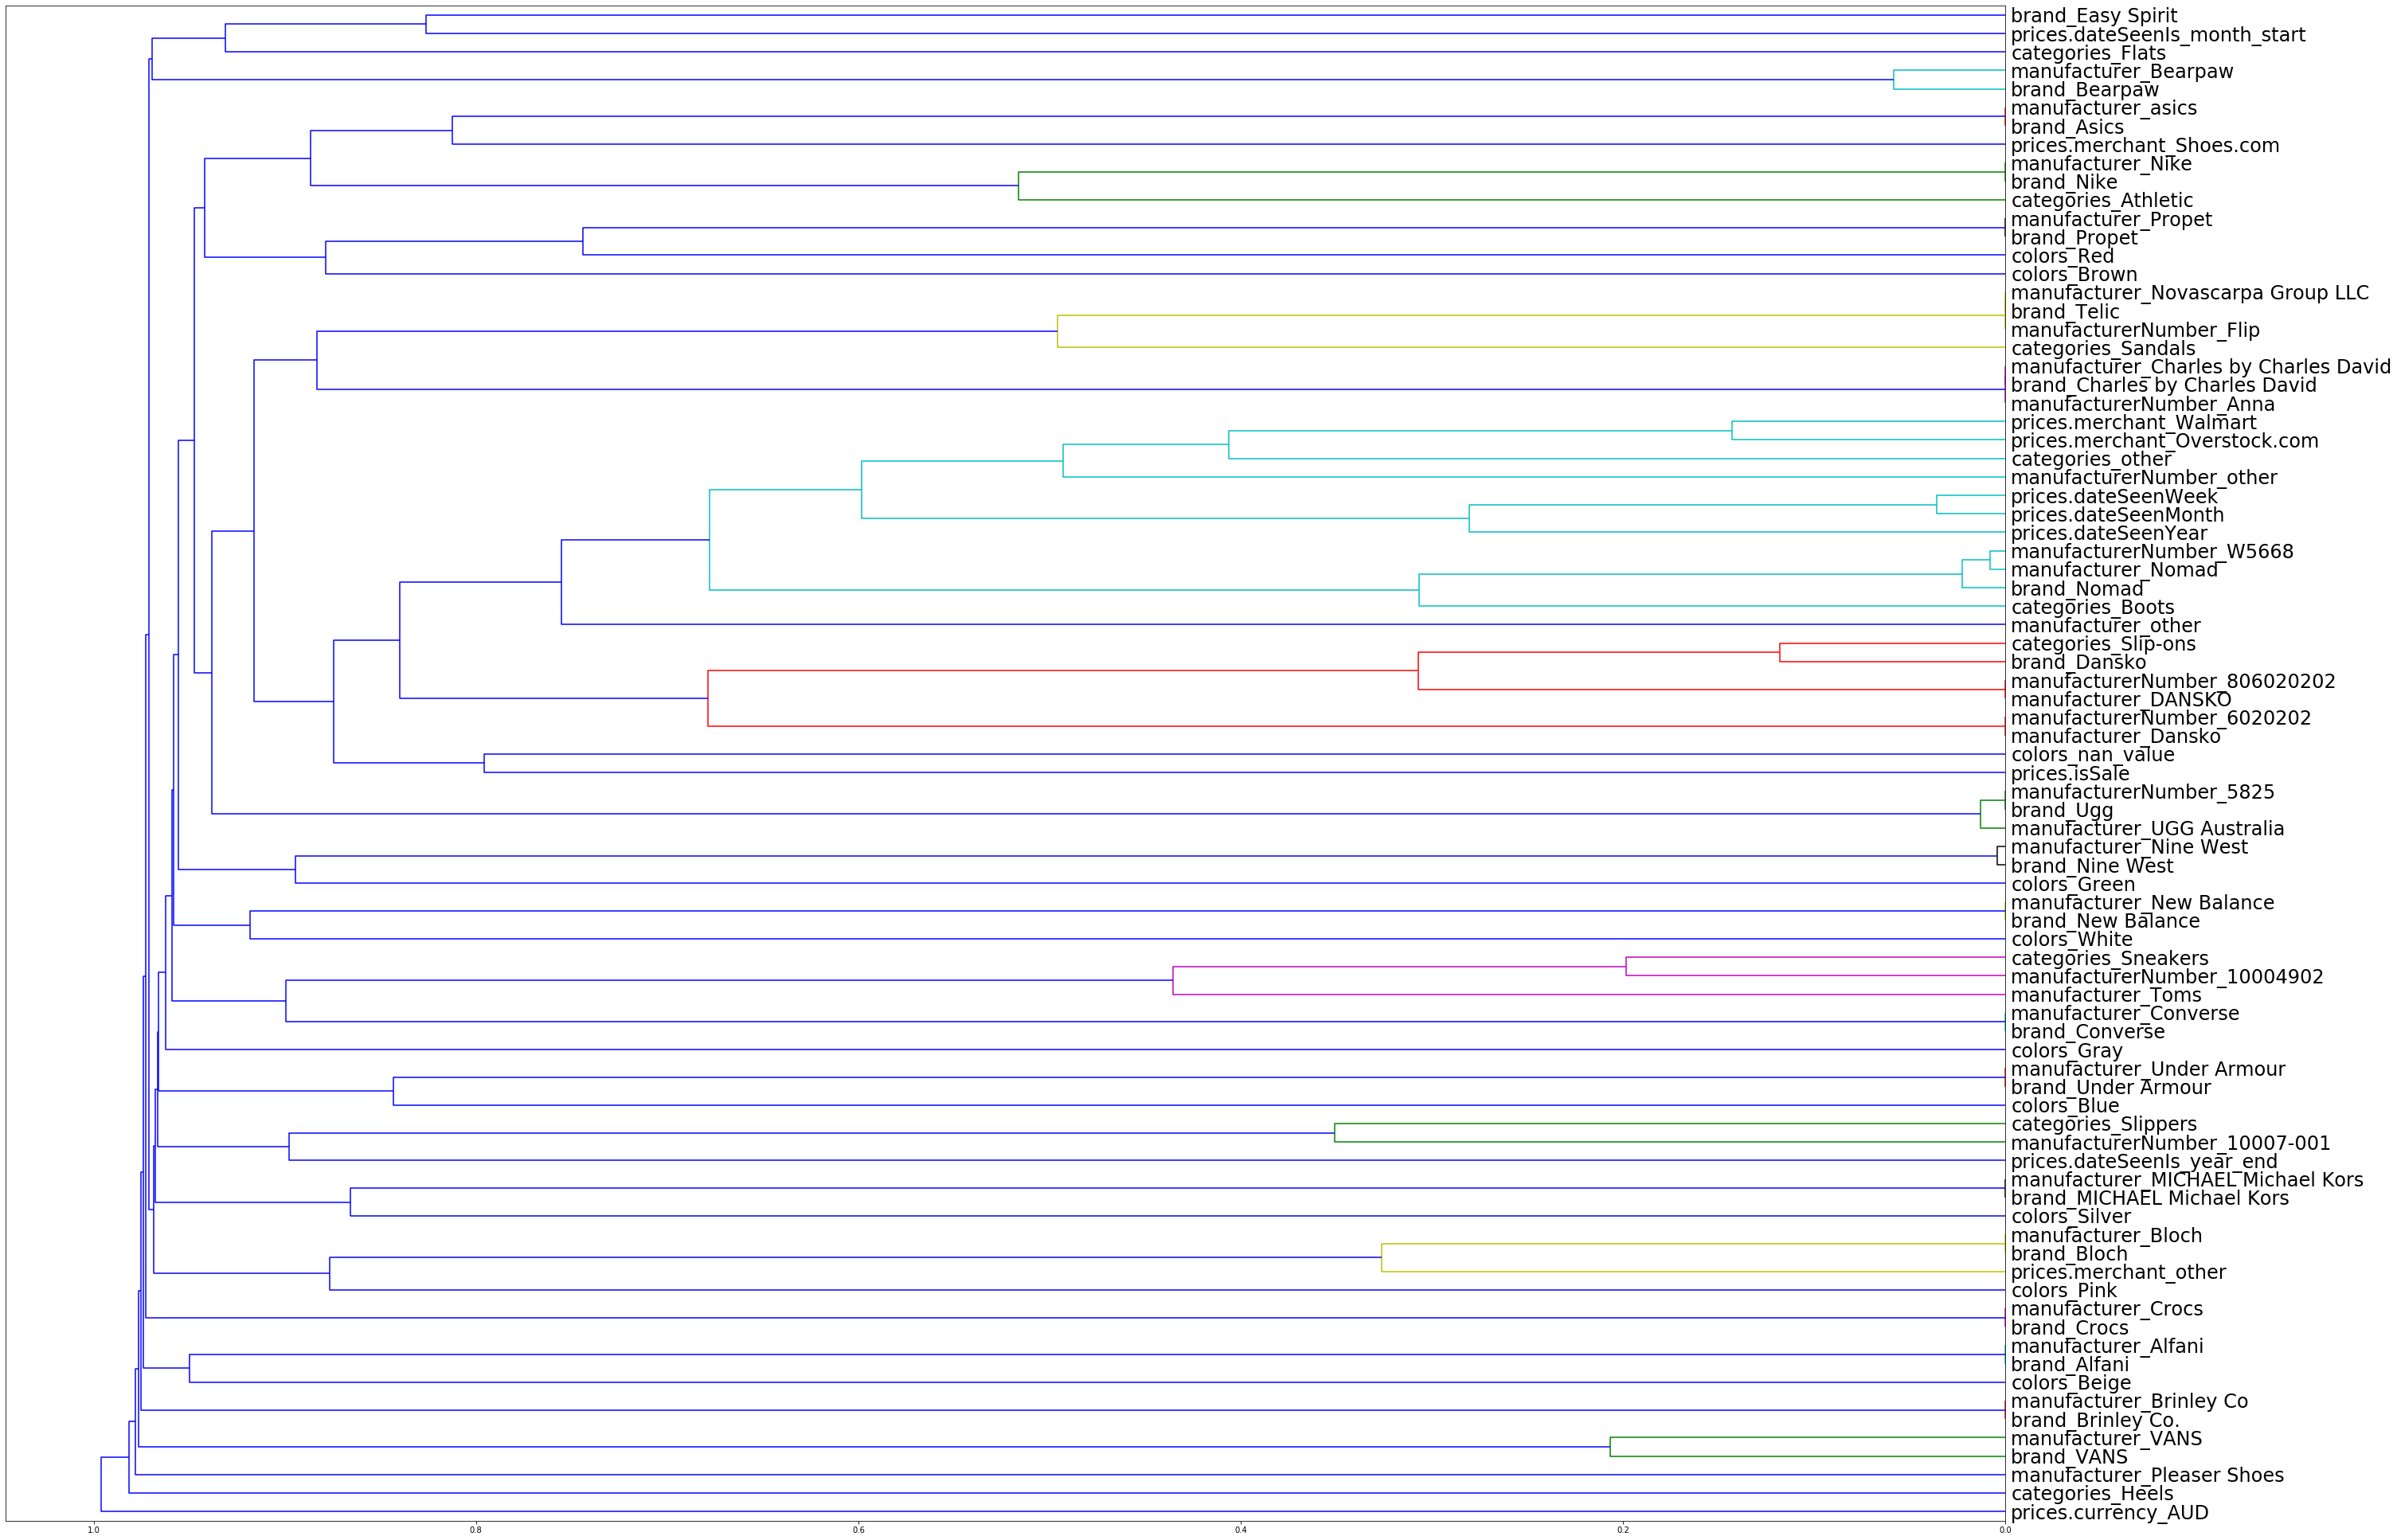

In [21]:
import scipy.cluster.hierarchy as hc
corr = df_reduced.corr(method = 'spearman')
corr_condensed = hc.distance.squareform(1 - np.abs(corr))
z = hc.linkage(corr_condensed, method = 'average')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(45,35))
dendrogram = hc.dendrogram(z, labels = selected_feat_names, orientation = 'left', leaf_font_size=24)

So with our dendrogram, we see that some brand_name and manufacturer_name under the same name are highly correlated, for instance, brand_Bearpaw and manufacturer_Bearpaw. I gather these column pairs, and delete one from the two.

### Removing Features

None of these look too similar to the other, so let's just try removing one at a time, and see what does the best.

In [20]:
df_reduced_delete_13 = df_reduced.drop(axis = 1, columns = ['prices.dateSeenYear', 'prices.dateSeenWeek', 'manufacturer_Bearpaw',
        'manufacturer_Brinley Co', 'manufacturer_DANSKO', 'manufacturer_Dansko', 'manufacturer_Nine West',
        'manufacturer_Nomad', 'manufacturer_UGG Australia', 'manufacturer_VANS', 'manufacturerNumber_W5668',
        'manufacturerNumber_10004902', 'categories_Slip-ons'])

In [45]:
df_reduced_delete_13.columns

Index(['prices.isSale', 'prices.dateSeenMonth',
       'prices.dateSeenIs_month_start', 'prices.dateSeenIs_year_end',
       'brand_Alfani', 'brand_Asics', 'brand_Bearpaw', 'brand_Bloch',
       'brand_Brinley Co.', 'brand_Charles by Charles David', 'brand_Converse',
       'brand_Crocs', 'brand_Dansko', 'brand_Easy Spirit',
       'brand_MICHAEL Michael Kors', 'brand_New Balance', 'brand_Nike',
       'brand_Nine West', 'brand_Nomad', 'brand_Propet', 'brand_Telic',
       'brand_Ugg', 'brand_Under Armour', 'brand_VANS', 'manufacturer_Alfani',
       'manufacturer_Bloch', 'manufacturer_Charles by Charles David',
       'manufacturer_Converse', 'manufacturer_Crocs',
       'manufacturer_MICHAEL Michael Kors', 'manufacturer_New Balance',
       'manufacturer_Nike', 'manufacturer_Novascarpa Group LLC',
       'manufacturer_Pleaser Shoes', 'manufacturer_Propet',
       'manufacturer_Toms', 'manufacturer_Under Armour', 'manufacturer_asics',
       'manufacturer_other', 'manufacturerNumber_1

In [23]:
X_delete_13 = df_reduced_delete_13

In [24]:
X_delete_13.shape

(3620, 69)

In [26]:
# RFECV
estimator = LinearRegression(n_jobs=-1)
rfe = RFECV(estimator, step=1, cv=5)
X_train_rfe = rfe.fit_transform(X_delete_13, y_train)

In [27]:
rfecv_scores = rfe.grid_scores_

In [28]:
num_features = list(range(0,69))[::1]

In [29]:
from graph import trace_values, plot
trace_rfecv = trace_values(num_features, rfecv_scores)
plot([trace_rfecv])

* This time, the line trend is more logic, and at the 37 features point we get 0.38 .
* If use 23 features we score only .20 .

### Rank the features

In [30]:
rfe = RFE(estimator, n_features_to_select=38)
rfe.fit(X_delete_13,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1,
                               normalize=False),
    n_features_to_select=38, step=1, verbose=0)

In [31]:
selected_cols = X_delete_13.columns[rfe.support_]

In [32]:
selected_cols

Index(['prices.isSale', 'brand_Alfani', 'brand_Asics', 'brand_Bloch',
       'brand_Brinley Co.', 'brand_Charles by Charles David', 'brand_Converse',
       'brand_Crocs', 'brand_Dansko', 'brand_MICHAEL Michael Kors',
       'brand_New Balance', 'brand_Nike', 'brand_Propet', 'brand_Telic',
       'brand_Ugg', 'brand_Under Armour', 'manufacturer_Alfani',
       'manufacturer_Bloch', 'manufacturer_Charles by Charles David',
       'manufacturer_Converse', 'manufacturer_Crocs',
       'manufacturer_MICHAEL Michael Kors', 'manufacturer_New Balance',
       'manufacturer_Nike', 'manufacturer_Novascarpa Group LLC',
       'manufacturer_Propet', 'manufacturer_Under Armour',
       'manufacturer_asics', 'manufacturerNumber_5825',
       'manufacturerNumber_6020202', 'manufacturerNumber_806020202',
       'manufacturerNumber_Anna', 'manufacturerNumber_Flip',
       'prices.merchant_Overstock.com', 'prices.merchant_Shoes.com',
       'prices.merchant_Walmart', 'prices.merchant_other',
       'ca

* So, I would like to choose the point of 38 features, which gets 0.37. Slipper is the only  category related name appearing here.

From the most significate 38 features, we can see most of them are brand names, manufacturer names, and some merchants online.

In [57]:
# Let's try 21 features to see what can we get.
rfe = RFE(estimator, n_features_to_select=23)
rfe.fit(X_delete_13,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1,
                               normalize=False),
    n_features_to_select=23, step=1, verbose=0)

In [58]:
selected_cols = X_delete_13.columns[rfe.support_]

In [59]:
selected_cols

Index(['brand_Asics', 'brand_Charles by Charles David', 'brand_Converse',
       'brand_Crocs', 'brand_MICHAEL Michael Kors', 'brand_Propet',
       'brand_Telic', 'brand_Ugg', 'brand_Under Armour',
       'manufacturer_Charles by Charles David', 'manufacturer_Converse',
       'manufacturer_Crocs', 'manufacturer_MICHAEL Michael Kors',
       'manufacturer_Novascarpa Group LLC', 'manufacturer_Propet',
       'manufacturer_Under Armour', 'manufacturer_asics',
       'manufacturerNumber_5825', 'manufacturerNumber_Anna',
       'prices.merchant_Overstock.com', 'prices.merchant_Shoes.com',
       'prices.merchant_Walmart', 'prices.merchant_other'],
      dtype='object')

* By reduce feature numbers from 38 to 23, the model removes some brands and manufacturers, but keep the four merchants, including Shoes.com, Walmart.com, Overstock.com and other_merchant. We can conclude that these three merchants have a high impact on the price.
* Some information, like the date related columns, colors columns and category columns are all removed at this level. In comparision with branding, they are less important.

### Model Score on test data

In [60]:
X_test = X_test[df_reduced_delete_13.columns]

In [61]:
X_test[selected_cols].shape

(1784, 23)

In [62]:
X_delete_13[selected_cols].shape

(3620, 23)

In [66]:
estimator = LinearRegression(n_jobs=-1)
rfe = RFE(estimator, n_features_to_select=23)
X_train_rfe_21 = rfe.fit_transform(X_delete_13[selected_cols],y_train)

In [67]:
estimator.fit(X_delete_13[selected_cols], y_train)
x_test_rfe = rfe.transform(X_test[selected_cols])
estimator.score(x_test_rfe, y_test)

0.1051975744411342

* The score of test is really bad, dropping from .2 to .10

### Final Model

### Final conclusion: the brand, the manufacturer which may be related to the brand, and the online merchant are the most important factors to the price of women shoes.

* There seems no differences between each colors of shoes. This may be caused by that, in my case, many shoes have multiple colors, and I split them into several rows. Or the second reason is in the market, the prices offered by different colors are almost the same for original prices.
* Which suprises me most is that, there is no difference between shoe categories. The one big reason I think is I remove the outlier prices.